In [1]:
#We are applying a deep learning model on mnist dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
 train_images.shape

(60000, 28, 28)

In [5]:
from matplotlib.pyplot import imshow

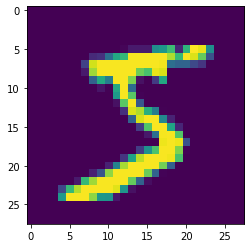

In [6]:
imshow(train_images[0])

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_labels[0]

5

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
test_labels.shape

(10000,)

In [12]:
from keras import models
from keras import layers

In [13]:
# This problem is multiclass classification problem
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [14]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrices=['accuracy'])
#for multiclass classification problem:
#last layer activation function -> softmax
#loss function -Categorical crossentropy

#Metrices
#For classification -> accuracy
#For Accuracy ->MSE

TypeError: Invalid keyword argument(s) in `compile()`: ({'metrices'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [15]:
train_images = train_images.reshape((60000, 28 * 28))  #transforming 2 dimensions into 1 because tensorflow works only with one dimension
train_images = train_images.astype('float32') / 255  #converting pixel between 0 and 1
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
#Normalization and scaling
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)   

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [19]:
network.predict(train_images[5].reshape((1,28*28)))

1/1 [==============================] - 0s 234ms/step


array([[0.1445119 , 0.14594197, 0.08177076, 0.06655755, 0.11545696,
        0.12944637, 0.10162485, 0.08014294, 0.07218222, 0.06236447]],
      dtype=float32)

In [20]:
network.predict(train_images[3].reshape((1,28*28)))

1/1 [==============================] - 0s 43ms/step


array([[0.11830978, 0.18401523, 0.07055864, 0.04902428, 0.1320442 ,
        0.11171222, 0.10318847, 0.05317457, 0.09969777, 0.07827481]],
      dtype=float32)

In [21]:
network.predict(train_images[3].reshape((1,28*28))).argmax()

1/1 [==============================] - 0s 45ms/step


1